In [39]:
import matplotlib.pyplot as plt
import numpy as np

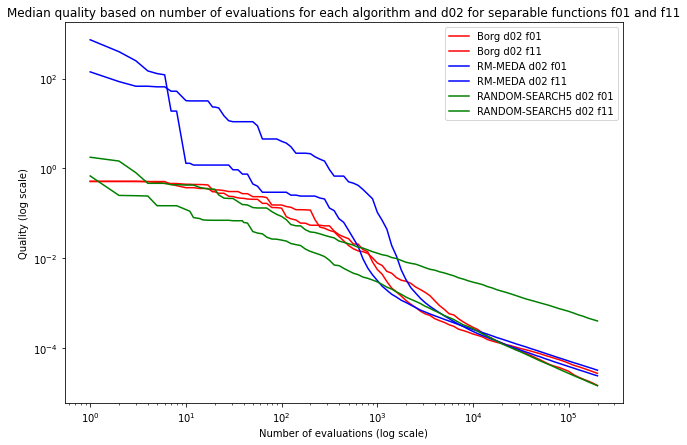

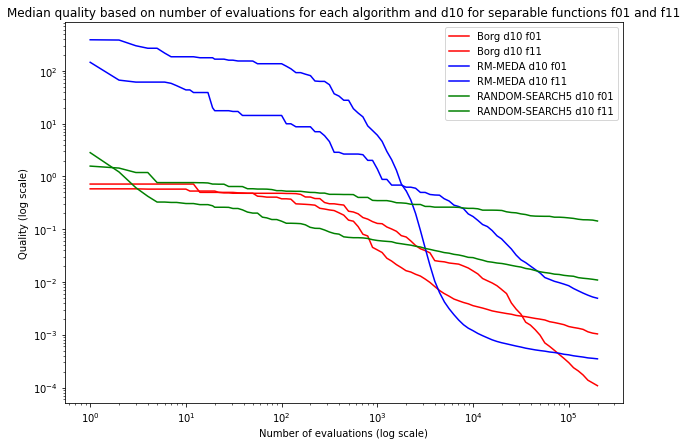

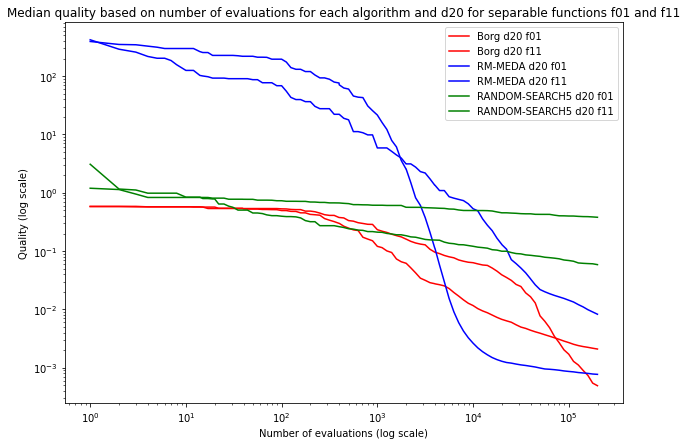

In [40]:
for j in ["d02", "d10", "d20"]:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    ax.set_title(f"Median quality based on number of evaluations for each algorithm and {j} for separable functions f01 and f11")
    ax.set_xlabel("Number of evaluations (log scale)")
    ax.set_ylabel("Quality (log scale)")
    ax.set_xscale("log")
    ax.set_yscale("log")
    # for each algorithm
    algo = ["Borg", "RM-MEDA","RANDOM-SEARCH5"]
    for i in range(3):
        # for each dimension
        for k in ["f01", "f11"]:
            match i:
                case 0:
                    color = "red"
                case 1:
                    color = "blue"
                case 2:
                    color = "green"
            instances = []
            instance = {}
            with open("../Algorithmes/" + algo[i] + "/Data/bbob-biobj_" + k +"_" + j +"_hyp.tdat") as file:
                for line in file:
                    if line[0] == "%" and instance:
                        instances.append(instance)
                        instance = {}
                    if line[0] == "%":
                        continue
                    line = line.split()
                    if (int(line[0]) < 2e5):
                        instance[int(line[0])] = float(line[1])
                instances.append(instance)

            # convert to numpy array
            for n, instance in enumerate(instances):
                instances[n] = np.array(list(instance.items()))

            # Do the median
            median = {}
            for instance in instances:
                for x, y in instance:
                    if x not in median:
                        median[x] = []
                    median[x].append(y)
            for x in median:
                median[x] = np.median(median[x])


            # Interpolation to make tables
            valeurs_seuils = {}
            for z in range(0, 6):
                valeurs_seuils[10**z] = np.interp(10**z, list(median.keys()), list(median.values()))

            with open(f"Tables/median_quality_separable_{j}.txt", "a") as file:
                file.write(f"{algo[i]} {j} {k}\n")
                file.write(str(valeurs_seuils) + "\n")
                file.write("-------------------\n \n")

            # plot
            ax.plot(list(median.keys()), list(median.values()), label=f"{algo[i]} {j} {k}", color=color)

    plt.legend()
    plt.show()
    fig.savefig(f"Pictures/median_quality_separable_{j}.png")

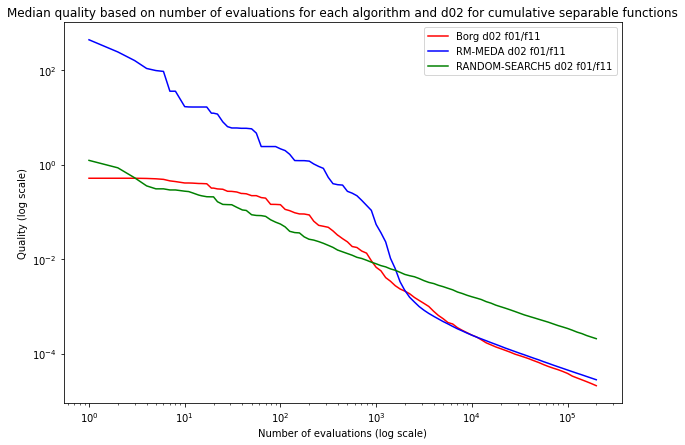

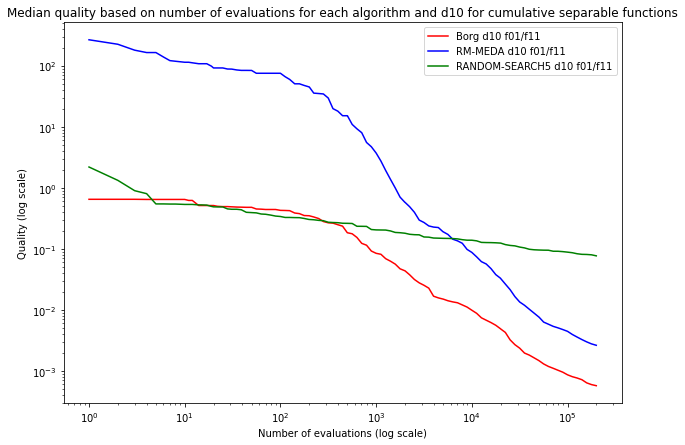

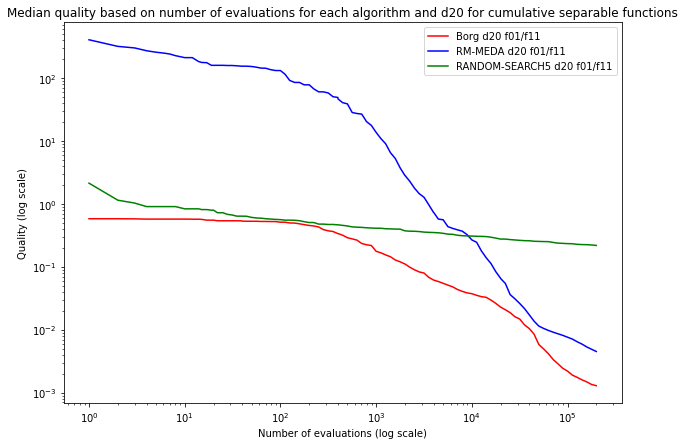

In [41]:
for j in ["d02", "d10", "d20"]:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    ax.set_title(f"Median quality based on number of evaluations for each algorithm and {j} for cumulative separable functions")
    ax.set_xlabel("Number of evaluations (log scale)")
    ax.set_ylabel("Quality (log scale)")
    ax.set_xscale("log")
    ax.set_yscale("log")
    # for each algorithm
    algo = ["Borg", "RM-MEDA","RANDOM-SEARCH5"]
    for i in range(3):
        match i:
            case 0:
                color = "red"
            case 1:
                color = "blue"
            case 2:
                color = "green"

        # for f01
        instances = []
        instance = {}
        with open("../Algorithmes/" + algo[i] + "/Data/bbob-biobj_" + "f01" +"_" + j +"_hyp.tdat") as file:
            for line in file:
                if line[0] == "%" and instance:
                    instances.append(instance)
                    instance = {}
                if line[0] == "%":
                    continue
                line = line.split()
                if (int(line[0]) < 2e5):
                    instance[int(line[0])] = float(line[1])
            instances.append(instance)

        # convert to numpy array
        for n, instance in enumerate(instances):
            instances[n] = np.array(list(instance.items()))

        # Do the median
        median = {}
        for instance in instances:
            for x, y in instance:
                if x not in median:
                    median[x] = []
                median[x].append(y)
        for x in median:
            median[x] = np.median(median[x])

        # for f11
        instances = []
        instance = {}
        with open("../Algorithmes/" + algo[i] + "/Data/bbob-biobj_" + "f11" +"_" + j +"_hyp.tdat") as file:
            for line in file:
                if line[0] == "%" and instance:
                    instances.append(instance)
                    instance = {}
                if line[0] == "%":
                    continue
                line = line.split()
                if (int(line[0]) < 2e5):
                    instance[int(line[0])] = float(line[1])
            instances.append(instance)

        # convert to numpy array
        for n, instance in enumerate(instances):
            instances[n] = np.array(list(instance.items()))

        # Do the median
        median2 = {}
        for instance in instances:
            for x, y in instance:
                if x not in median2:
                    median2[x] = []
                median2[x].append(y)
        for x in median2:
            median2[x] = np.median(median2[x])

        # Cumulative median
        for x in median:
            median[x] = (median[x] + median2[x]) / 2

        # Interpolation to make tables
        valeurs_seuils = {}
        for z in range(0, 6):
            valeurs_seuils[10**z] = np.interp(10**z, list(median.keys()), list(median.values()))

        with open(f"Tables/median_quality_separable_{j}_cumulative.txt", "a") as file:
            file.write(f"{algo[i]} {j} f01/f11 cumulative\n")
            file.write(str(valeurs_seuils) + "\n")
            file.write("-------------------\n \n")

        # plot
        ax.plot(list(median.keys()), list(median.values()), label=f"{algo[i]} {j} f01/f11", color=color)

    plt.legend()
    plt.show()
    fig.savefig(f"Pictures/median_quality_separable_{j}_cumulative.png")